In [18]:
!  pip install pandas numpy matplotlib scikit-learn

import pandas as pd
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import Normalizer 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, make_scorer, f1_score
import matplotlib.pyplot as plt
import numpy as np



# Leitura de dados utilizando a biblioteca pandas.


data= pd.read_csv("data.csv")
data = pd.DataFrame(data)

# Remove a coluna de ID que para treinamento será desnecessária.

data = data.drop("id", axis='columns')
data


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,target
0,6.037742,18.243454,40.381390,9.784733,3.451509,4.194046,30.072374,3.476667,6.521961,6.605738,22.462237,68.671411,2.123557,4.556672,3.280207,0
1,4.864813,18.052841,28.834526,11.217766,2.443611,5.655477,41.134720,3.694615,5.626523,6.536719,12.144566,59.243116,3.237363,2.378608,6.277202,0
2,5.990206,13.298591,36.587566,9.008438,2.023970,6.461286,32.538523,2.947297,5.333709,4.815262,16.393260,56.160007,3.768556,2.549477,5.292898,0
3,6.026474,21.558925,24.664167,9.261698,2.814130,6.180293,33.154155,3.403718,4.414961,7.806231,9.716835,46.486271,2.134216,2.264123,5.567176,0
4,6.644875,25.254258,31.836788,6.095689,2.972857,5.901883,47.081506,2.149458,6.531795,9.144267,15.906459,68.774964,2.899033,2.402410,4.993752,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,5.648692,12.151903,33.616939,7.365216,3.193612,5.690936,37.681454,2.041982,6.170510,4.400060,18.368037,64.970902,2.393963,2.750069,4.265303,1
4196,5.234917,22.252772,34.026744,11.575644,3.845047,4.362713,35.228194,3.141254,6.162440,8.057464,17.143794,64.885928,2.265420,3.990728,4.966921,0
4197,5.373518,21.427144,30.300114,8.139834,0.375249,3.257935,26.803596,4.639369,8.558725,7.758514,18.106558,90.117027,2.081920,4.791632,3.620163,0
4198,8.365826,15.016489,44.254349,11.368578,4.242211,4.292858,31.827755,4.008945,3.493721,5.437292,12.841858,36.786293,2.775595,2.661320,3.082622,0


In [19]:
"""
    Ordenamos as amostras pela coluna target e escolhemos os ultimos 800 elementos, eliminando 3400 ocorrencias.

    Essa decisão foi tomada pelo fato de, o numero de acorrencia com target=0 ser extremamente superior ao numero de ocorrencias com target=1.
    A titulo de informação, o numero de ocorrencias de 0s é cerca de 12 vezes maior do que a de 1s.
    Em testes anteriores isso ocasionava uma quantidade muito grande de erros na predição de 1s.

    Por isso, decidimos aproximar o numero de ocorrencias das classes no dataset de treinamento, o que causou uma melhor performance.

"""

data = data.sort_values("target").iloc[-800:]
pd.DataFrame(data.iloc[:, 12:])

,col_12,col_13,col_14,target
3501,1.940201,3.593715,3.892735,0
3502,2.263092,3.978941,5.001907,0
3503,2.359612,2.847351,4.556371,0
3504,1.813626,2.781324,5.925271,0
3505,2.942607,3.378112,4.442734,0
...,...,...,...,...
3234,1.894105,2.599733,4.209581,1
2531,3.168759,2.533583,5.721238,1
3885,3.250885,2.605461,5.673382,1
3154,3.444297,3.533187,3.927719,1


In [20]:
data.corr()['col_4']

col_0     0.153708
col_1     0.157552
col_2     0.177753
col_3     0.046813
col_4     1.000000
col_5    -0.024610
col_6     0.075899
col_7     0.080079
col_8    -0.308620
col_9     0.157552
col_10    0.135509
col_11   -0.308620
col_12   -0.112937
col_13    0.030798
col_14   -0.151378
target   -0.045595
Name: col_4, dtype: float64

In [21]:
data["target"].value_counts()

target
0    484
1    316
Name: count, dtype: int64

In [22]:
"""
    Separa o dataset em X e y.

    X representa os dados que devem ser utilizados para realizar a classificação

    Y representa a classe real das amostras, o valor que deve ser idealmente deduzido partindo de X 

"""

X = data.iloc[:, 0 :15]
y = data.iloc[:, -1:]
print(X.iloc[:, -1:], y)


        col_14
3501  3.892735
3502  5.001907
3503  4.556371
3504  5.925271
3505  4.442734
...        ...
3234  4.209581
2531  5.721238
3885  5.673382
3154  3.927719
4195  4.265303

[800 rows x 1 columns]       target
3501       0
3502       0
3503       0
3504       0
3505       0
...      ...
3234       1
2531       1
3885       1
3154       1
4195       1

[800 rows x 1 columns]


In [23]:
"""
    Divisão do dataset em treinamento e teste
"""

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size= 0.2, random_state=1, shuffle=True)

In [24]:

"""
    GridSearchCV é uma classe do Scikit Learn que automatiza uma serie de funções.

    Nela podemos especificar todos os hiperparametros que desejamos testar, como por exemplo, as camadas da rede,
    as diferentes funções de ativação e as taxas de aprendizado.
    Com esses valores declarados, a classe GridSearch treinará modelos com todas as permutações possiveis desses 
    hiperparametros, no total tendo 64 permutações. Por fim, é escolhido o melhor de acordo com alguma metrica declarada.

    GridSearch permite que declaremos metricas para analisarmos os resultados dos modelos. No caso escolhemos a metrica f1 para
    definir qual será o melhor modelo. Essa decisão se deu pela necessidade de reduzir o numero medio de falsos positivos e negativos
    nas predições. 
    
    Alem disso, GridSearch, implicitamente, executa cross validation, para cada uma das combinações de hiperparametros.
    Cross Validation consiste em dividir o dataset de treinamento em K grupos disjuntos de mesmo tamanhos. Em k iterações
    um dos grupos não escolhido anteriormento é usado como dataset de validação, e os outros k-1 são usados para treinamento.
    Por fim, para cada combinação de hiperparametros, o melhor modelo é escolhido, tambem de acordo com a metrica estabelecida.
"""

grid = GridSearchCV(
             estimator=MLPClassifier(),
             param_grid={
                "hidden_layer_sizes" : [
                    (100),
                    (100, 100),
                    (100, 100, 100, 100),
                    (50, 50, 50, 50),
                ],
                "activation": ['relu', 'identity', 'logistic', 'tanh'],
                "learning_rate_init":[0.004, 0.01, 0.0001, 0.005],

             },
             cv=4,
             scoring={
                 "precision" : make_scorer(precision_score),
                 "recall" : make_scorer(recall_score),
                 "f1" : make_scorer(f1_score),
             },
             return_train_score=True,
             refit='f1',
            )

In [25]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [26]:
"""
    Treinamento
"""
grid.fit(Xtrain, Ytrain)

c:\Users\marin_smb5c9y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marin_smb5c9y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marin_smb5c9y\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marin_smb5c9y\Ap

GridSearchCV(cv=4, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'identity', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [100, (100, 100),
                                                (100, 100, 100, 100),
                                                (50, 50, 50, 50)],
                         'learning_rate_init': [0.004, 0.01, 0.0001, 0.005]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [27]:
"""
    Tabela de resultados das cross validation
    
    
    Temos como tempo de convergencia do modelo ideal a medida de "mean_fit_time" do primeiro rankeado
"""

pd.DataFrame(grid.cv_results_).sort_values("rank_test_f1").head(5)[["mean_fit_time", "std_fit_time", "rank_test_f1"]]



,mean_fit_time,std_fit_time,rank_test_f1
3,0.060862,0.022626,1
7,0.495589,0.181694,2
36,1.351586,0.425264,3
43,2.232804,0.471023,4
35,0.378511,0.107371,5


In [28]:
"""
    Gerando predição para dataset de Treinmento
"""
testing = grid.predict(Xtrain)

In [29]:
train_accuracy = accuracy_score(Ytrain, testing)
print("Training Accuracy: " + str(train_accuracy*100) + "%")
comp_table = pd.DataFrame({'True Target': np.ravel(Ytrain), 'Predicted Target': testing})
comp_table['Squared_Error'] = (comp_table['True Target'] - comp_table['Predicted Target'])**2
MSE1 = int('0')
for x in comp_table.Squared_Error:
    MSE1 += x
print(f"Mean Squared Error: {MSE1}")
print("Total de targets: " + str(comp_table['Squared_Error'].size))

Training Accuracy: 71.875%
Mean Squared Error: 180
Total de targets: 640


Matriz de confusão: 


array([[347, 134],
       [ 46, 113]])

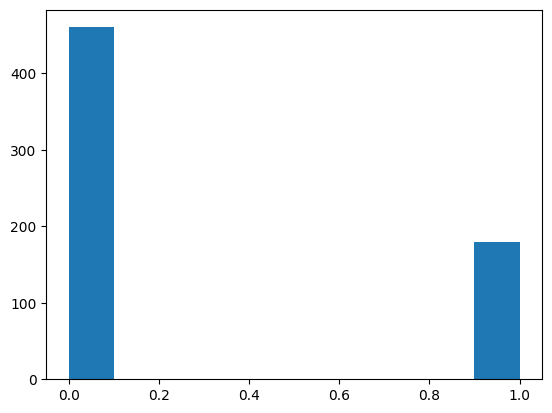

In [30]:
"""
    Os zeros aqui representam que o modelo acertou 
"""
plt.hist(comp_table['Squared_Error'])
print("Matriz de confusão: ")
confusion_matrix(testing, Ytrain)

In [31]:
# Comparando resultados esperados com os gerados
 
results = grid.predict(Xtest)

In [32]:
comp_table = pd.DataFrame({'True Target': np.ravel(Ytest), 'Predicted Target': results})
comp_table['Squared_Error'] = (comp_table['True Target'] - comp_table['Predicted Target'])**2
MSE2 = int('0')
for x in comp_table.Squared_Error:
    MSE2 += x
print(f"Mean Squared Error: {MSE2}")
test_accuracy = accuracy_score(Ytest, results)
print("Accuracy: " + str(test_accuracy*100) + "%")

Mean Squared Error: 48
Accuracy: 70.0%


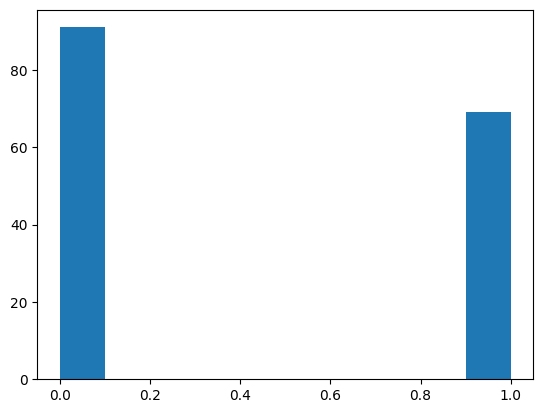

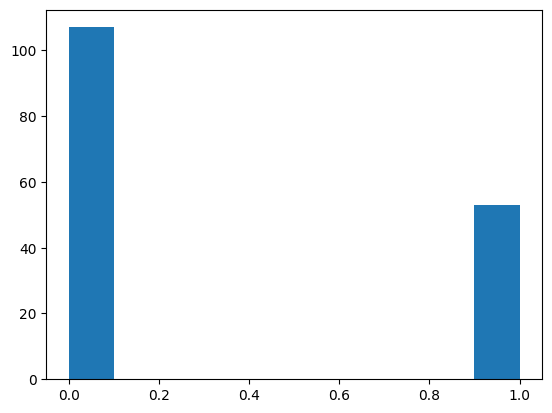

Matriz de Confusão: 


array([[75, 32],
       [16, 37]])

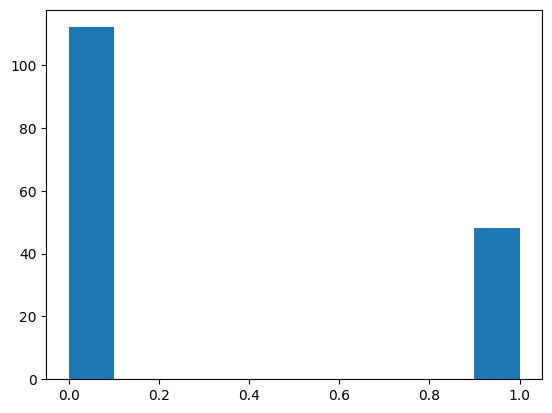

In [38]:
import matplotlib.pyplot as plt
plt.close()
plt.hist(Ytest)
plt.show()
plt.close()
plt.hist(results)
plt.show()
plt.hist(comp_table['Squared_Error'])
print("Matriz de Confusão: ")
confusion_matrix(results, Ytest)

In [34]:
print(Ytest.value_counts())
print(pd.DataFrame(results).value_counts())

target
0         91
1         69
Name: count, dtype: int64
0
0    107
1     53
Name: count, dtype: int64
